In [48]:
import numpy as np
import pandas as pd
import seaborn as sbn
import pickle as pkl
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,make_scorer
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn import metrics
from math import log
%pylab inline
def plot_prob_timeline(data,label):
    fig = plt.figure()
    plt.plot(data)
    fig.suptitle(label, fontsize=20)
    plt.xlabel('Time', fontsize=18)
    plt.ylabel('Probability', fontsize=16)
    
def eval_probs(y_prob,y_test, labels):
    """
    y_prob : predict_proba output of a model
    labels : all unique labels in the classification
    """
    
    vals = []
    titles = {}
    titles[-1] = "Away Win"
    titles[0] = "Draw"
    titles[1] = "Home Win"

    y_prob = pd.DataFrame(y_prob, columns=[-1, 0, 1])
    y_prob = y_prob.round(1)
    y_prob['label'] = y_test.reset_index(drop=True)
    
    for ind, label in enumerate(labels):
        vals = sorted(y_prob[label].unique())
        
        y_col = []
        
        
        for i in vals:
            tot_len = y_prob[(y_prob[label] == i)].shape[0]
            matching_len = y_prob[(y_prob[label] == i) & (y_prob['label'] == label)].shape[0]
            y_col.append(matching_len*1.0/tot_len)
        
#         print vals
#         print y_col
#         y.append(y_col)
        
        plt.figure(figsize=(10,16))
        plt.subplot(311+ind)
        plt.bar(vals, y_col, width=0.05)
        plt.title(titles[label], fontsize=16)
        plt.xticks(np.arange(0.0, 1.1, 0.1), fontsize=15)
        plt.yticks(fontsize=15)
        plt.show()

Populating the interactive namespace from numpy and matplotlib


In [2]:
# with open("./data/train_data.pkl") as infile:
#     train_data = pkl.load(infile)

with open("./data/train/train_data.pkl") as infile:
    train_data = pkl.load(infile)


In [3]:
# train_data.columns.values
temp_data = train_data.copy(deep = True)
# temp_data.columns.values

In [4]:
columns = ['date', 'B365H', 'B365D', 'B365A', 'match_id', 'home_team', 'away_team', 
           'winner', 'minute', 'H_Goal', 'A_Goal']
train_data = train_data[columns]

In [5]:
train_data.shape

(183535, 11)

In [6]:
# train_data.match_id.value_counts()

In [7]:
# train_data[(train_data['match_id']==1510566245714) & (train_data['minute']>=45)]

In [8]:
train_data.drop_duplicates(inplace=True, keep='first')

In [9]:
# train_data.match_id.value_counts()

In [10]:
X = train_data.drop(['winner', 'date', 'match_id', 'home_team', 'away_team'], axis=1)
Y = train_data['winner']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1,shuffle= False)

## Support Vector Classifier

In [92]:
svc = svm.SVC(probability=True)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print metrics.accuracy_score(y_test, y_pred)

y_prob = svc.predict_proba(X_test)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Logistic Regression

In [12]:
lr = LogisticRegression(n_jobs=-1,multi_class='multinomial',solver='lbfgs')
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

print metrics.accuracy_score(y_test, y_pred)

y_prob = lr.predict_proba(X_test)

0.680718576073


In [13]:

# print temp_data.columns.values


In [51]:
temp_data = temp_data[columns]
X = temp_data.drop(['winner'], axis=1)
Y = temp_data['winner']
X_trainA, X_testA, y_trainA, y_testA = train_test_split(X, Y, test_size=0.1,shuffle= False)
head = X_testA


A = head.loc[head['match_id'] == 1510602646114]
A=A.drop([  'date', 'match_id', 'home_team', 'away_team'], axis=1)


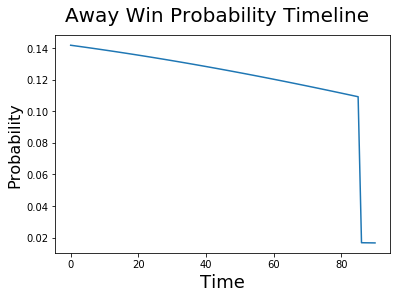

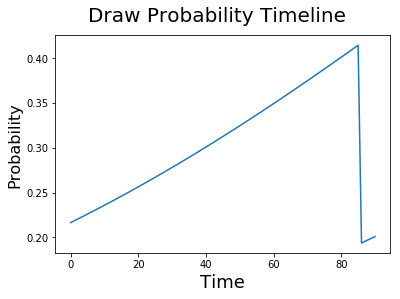

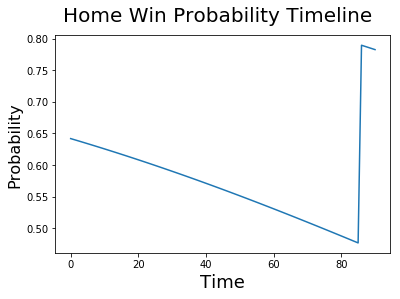

In [52]:

plot_prob_timeline(y_prob[:,0],'Away Win Probability Timeline')
plot_prob_timeline(y_prob[:,1],'Draw Probability Timeline')
plot_prob_timeline(y_prob[:,2],'Home Win Probability Timeline')


## Evaluation Environment 

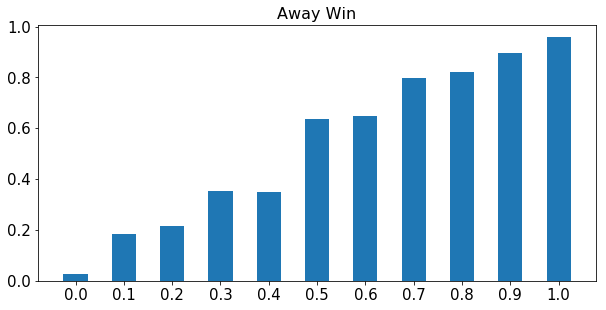

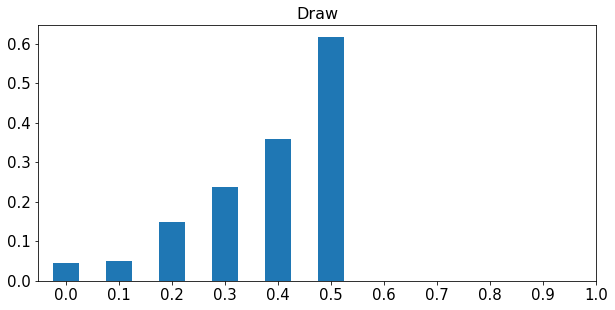

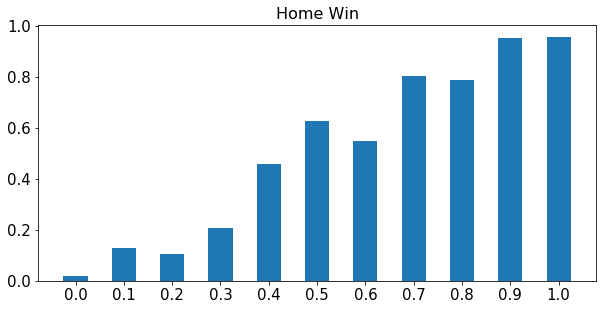

In [31]:
eval_probs(y_prob, y_test,[-1, 0, 1])

In [40]:

y_prob = pd.DataFrame(y_prob, columns=[-1, 0, 1,2])
print(y_prob.head)

<bound method DataFrame.head of         -1    0    1   2
0      0.0  0.3  0.7 NaN
1      0.0  0.3  0.7 NaN
2      0.2  0.5  0.4 NaN
3      0.2  0.5  0.3 NaN
4      0.2  0.5  0.3 NaN
5      0.2  0.5  0.3 NaN
6      0.2  0.5  0.3 NaN
7      0.2  0.5  0.3 NaN
8      0.4  0.3  0.3 NaN
9      0.4  0.3  0.3 NaN
10     0.4  0.3  0.3 NaN
11     0.4  0.3  0.3 NaN
12     0.4  0.3  0.3 NaN
13     0.4  0.3  0.3 NaN
14     0.4  0.3  0.3 NaN
15     0.4  0.3  0.3 NaN
16     0.4  0.3  0.3 NaN
17     0.4  0.3  0.3 NaN
18     0.4  0.3  0.3 NaN
19     0.4  0.3  0.3 NaN
20     0.4  0.3  0.3 NaN
21     0.4  0.3  0.3 NaN
22     0.4  0.3  0.3 NaN
23     0.4  0.3  0.3 NaN
24     0.3  0.3  0.3 NaN
25     0.3  0.3  0.3 NaN
26     0.3  0.3  0.3 NaN
27     0.3  0.3  0.3 NaN
28     0.3  0.3  0.3 NaN
29     0.3  0.4  0.3 NaN
...    ...  ...  ...  ..
18117  0.9  0.1  0.0 NaN
18118  0.8  0.2  0.0 NaN
18119  0.8  0.2  0.0 NaN
18120  0.5  0.3  0.2 NaN
18121  0.5  0.3  0.2 NaN
18122  0.5  0.3  0.2 NaN
18123  0.5  0.3  0

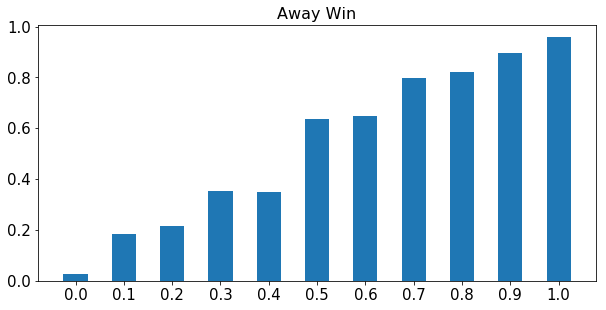

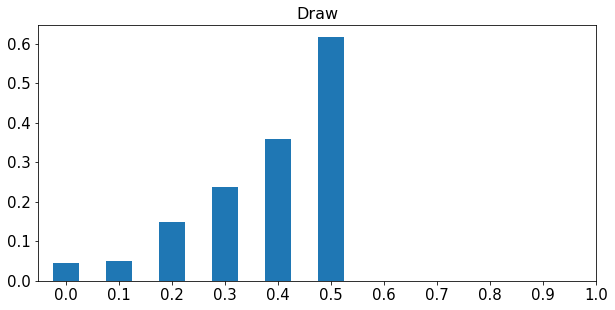

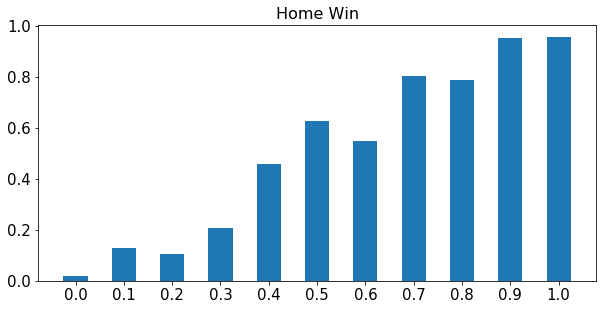

In [34]:
# predict_proba
#  y_prob : predict_proba output of a model
#     labels : all unique labels in the classification
#     """
a = True
if a:
    labels = [-1, 0, 1]
    vals = []
    titles = {}
    titles[-1] = "Away Win"
    titles[0] = "Draw"
    titles[1] = "Home Win"

    y_prob = pd.DataFrame(y_prob, columns=[-1, 0, 1])
    y_prob = y_prob.round(1)
    y_prob['label'] = y_test.reset_index(drop=True)
    
    for ind, label in enumerate(labels):
        vals = sorted(y_prob[label].unique())
        
        y_col = []
        
        
        for i in vals:
            tot_len = y_prob[(y_prob[label] == i)].shape[0]
            matching_len = y_prob[(y_prob[label] == i) & (y_prob['label'] == label)].shape[0]
            y_col.append(matching_len*1.0/tot_len)
        
#         print vals
#         print y_col
#         y.append(y_col)
        
        plt.figure(figsize=(10,16))
        plt.subplot(311+ind)
        plt.bar(vals, y_col, width=0.05)
        plt.title(titles[label], fontsize=16)
        plt.xticks(np.arange(0.0, 1.1, 0.1), fontsize=15)
        plt.yticks(fontsize=15)
        plt.show()